# NLP

En esta práctica vamos a realizar:
- Web scraping a Wikipedia
- Conversión de los datos a DataFrame
- Limpieza preliminar de los datos
- Creación y lectura de pickles

Al final de la práctica tendremos:
- Un corpus
- Document-term matrix

# Web scraping

In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Accede a los datos de artículos aleatorios de Wikipedia
# Devuelve el nombre del artículo y una lista de los párrafos del artículo
def rws():
    request = requests.get('https://en.wikipedia.org/wiki/Special:Random')
    page = request.text
    name = request.url.split("/")[-1]
    soup = BeautifulSoup(page, "html.parser")
    return (name, [p.get_text() for p in soup.find_all("p")])

# Combina una lista de texto y devuelve dicha combinación
def combine_text(text_list):
  return ''.join(text_list)

# Crea un diccionario con claves: nombres de los artículos y valores: texto
# obtenido de cada artículo
def scrap_data(n):
  dct = {}
  for i in range(n):
    k, v = rws()
    dct[k] = combine_text(v)
  return dct

In [ ]:
wikidict = scrap_data(4)

In [ ]:
wikidict

{'Canyon_Gate_Country_Club': "Canyon Gate Country Club is a golf club to the west of Las Vegas, Nevada. The 6742 yard course was established in 1989, and was designed by Ted Robinson.[1] It hosted the Las Vegas LPGA in 1993. The club also has amenities for tennis, swimming and fitness. The men's card room and bar were designed by Chris Consultants.[2]\n36°8′55″N 115°17′14″W\ufeff / \ufeff36.14861°N 115.28722°W\ufeff / 36.14861; -115.28722\nThis Clark County, Nevada state location article is a stub. You can help Wikipedia by expanding it.This golf club or course-related article is a stub. You can help Wikipedia by expanding it.",
 'Joe_Holiday': '\nJoseph Befumo, known professionally as Joe Holiday (10 May 1925 – 9 February 2016), was an American  jazz saxophonist who was born in Sicily.[1]\nThe father of the Befumo family played clarinet.[2] In 1925 the family emigrated to the United States, taking residence in Newark, New Jersey, where young Joseph picked up his father\'s instrument a

# Almacenando/Cargando los datos en pickles

In [ ]:
!rm -r "/content/drive/MyDrive/Colab Notebooks/data"

In [ ]:
!mkdir "/content/drive/MyDrive/Colab Notebooks/data"

In [ ]:
# Creamos los ficheros con los datos en la carpeta data

def write_pickles(path):
  for w in wikidict:
    with open(path + w, "wb") as file:
      pickle.dump(wikidict[w], file)

In [ ]:
write_pickles("/content/drive/MyDrive/Colab Notebooks/data/")

In [ ]:
# Cargamos los datos de nuestra carpeta data en un dict

def load_pickles(path):
  data = {}
  for c in wikidict.keys():
      with open(path + c, "rb") as file:
          data[c] = pickle.load(file)
  return data

# Limpieza de datos

## Limpieza común de texto

- Hacer todo el texto lowercase
- Eliminar símbolos de puntuación
- Eliminar valores numéricos
- Eliminar texto "non-sensical"
- Tokenizar los datos
- Eliminar las stop words

In [ ]:
# Primero creamos un dataframe con los datos del diccionario
import pandas as pd

wiki_items = wikidict.items()
wiki_list = list(wiki_items)

df = pd.DataFrame(wikidict.items(), columns=['name', 'text'])

In [ ]:
data_combined = {key: [combine_text(value)] for (key, value) in wikidict.items()}

In [ ]:
import pandas as pd

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['text']
data_df = data_df.sort_index()
data_df

,text
%C3%81lex_M%C3%A1rquez,\nÁlex Márquez Alentà (born 23 April 1996) is ...
1967%E2%80%9368_Scottish_Cup,\nThe 1967–68 Scottish Cup was the 83rd stagin...
1984_European_Athletics_Indoor_Championships_%E2%80%93_Women%27s_long_jump,\nThe women's long jump event at the 1984 Eur...
2013_BBL_Champions_Cup,The 2013 BBL Champions Cup was the eighth edit...
Acacia_ericifolia,\nAcacia ericifolia is a shrub belonging to th...
Ada_Tschechowa,\nAda Tschechowa (Russian: Ада Михайловна Чехо...
Alderetes,Alderetes is a city in the Cruz Alta Departmen...
Annette_Langen,Annette Langen (born 29 April 1967) is a Germa...
"Anthony_Fane,_13th_Earl_of_Westmorland",\nLieutenant-Colonel Anthony Mildmay Julian Fa...
Brisen,"The Brisen is a mountain of the Urner Alps, lo..."


In [ ]:
# Método para limpiar el texto
# Página para revisar las regex: https://regex101.com/

import re
import string

def clean_text(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('–*', '', text)
  text = re.sub('—', '', text)
  text = re.sub('\n', '', text)
  text = re.sub('←→', '', text)
  return text

text_cl = lambda x: clean_text(x)

# Corpus

En la variable corpus ya tenemos el Corpus con todo el texto obtenido a partir de Wikipedia.



In [ ]:
# Podemos consultar los valores de text asociados a los índices
# Si hiciera falta realizar una mayor limpieza en el texto podríamos realizar
# otra nueva versión de clean_text y aplicar más expresiones regulares
corpus = pd.DataFrame(data_df.text.apply(text_cl))
corpus

,text
%C3%81lex_M%C3%A1rquez,álex márquez alentà born april is a grand pr...
1967%E2%80%9368_Scottish_Cup,the scottish cup was the staging of scotland...
1984_European_Athletics_Indoor_Championships_%E2%80%93_Women%27s_long_jump,the womens long jump event at the european a...
2013_BBL_Champions_Cup,the bbl champions cup was the eighth edition ...
Acacia_ericifolia,acacia ericifolia is a shrub belonging to the ...
Ada_Tschechowa,ada tschechowa russian ада михайловна чехова ...
Alderetes,alderetes is a city in the cruz alta departmen...
Annette_Langen,annette langen born april is a german writer...
"Anthony_Fane,_13th_Earl_of_Westmorland",lieutenantcolonel anthony mildmay julian fane ...
Brisen,the brisen is a mountain of the urner alps loc...


# Document-Term Matrix

Una matriz Document-Term describe la frecuencia de aparición de eventos en una colección de documentos.

- filas: documento
- columnas: términos(terms) dentro del documento

Los terms son palabras separadas por espacios, formando un bag of words, en el que no se refleja el orden de aparición de las palabras en el texto.

En este paso vamos a realizar una división del texto en unidades más pequeñas llamadas tokens.

Los tokens pueden ser: palabras, bi-grams, tri-grams o n-grams, pero en este caso vamos a utilizar la división en palabras.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Creamos un CountVectorizer para transformar nuestro texto en un vector
# Le debemos pasar como parámetro las stop words (palabras comunes que no
# añaden significado al texto)

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(corpus.text)
dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
dtm.index = corpus.index
dtm.shape

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/data/cv.pkl', "wb") as file:
  pickle.dump(cv, file)

In [ ]:
corpus_dtm = [corpus, dtm]

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/data/corpus_dtm.pkl', "wb") as file:
      pickle.dump(corpus_dtm, file)

# EDA: Exploratory Data Analysis

- Estudio de las palabras más comunes por cada texto
- Estudio de palabras únicas en cada texto

In [ ]:
dtm_t = dtm.transpose()
dtm_t

,Empress_Of,Halifax_Public_Gardens,Jenny_Heijun_Wills,List_of_Asphodelaceae_of_South_Africa,Marshall_Carter,Mueang_Maha_Sarakham_district,No._49_Squadron_RAF,Sergio_Aguayo,The_Legends_(Tejano_band),With_All_of_My_Heart
able,0,0,0,0,0,0,1,0,0,0
academia,0,0,0,0,0,0,0,1,0,0
academic,0,0,0,0,0,0,0,1,0,0
academy,0,0,0,0,1,0,0,1,0,0
accepted,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
zoegirls,0,0,0,0,0,0,0,0,0,2
zombies,1,0,0,0,0,0,0,0,0,0
zones,0,0,0,1,0,0,0,0,0,0
องมหาสารคาม,0,0,0,0,0,1,0,0,0,0


In [ ]:
top_dict = {}

for c in dtm_t:
  top = dtm_t[c].sort_values(ascending=False).head(30)
  top_dict[c] = list(zip(top.index, top.values))

top_dict

{'Empress_Of': [('released', 16),
  ('rodriguez', 14),
  ('single', 12),
  ('music', 9),
  ('album', 6),
  ('recordings', 6),
  ('terrible', 6),
  ('empress', 6),
  ('ep', 6),
  ('april', 5),
  ('featured', 5),
  ('respectively', 4),
  ('october', 4),
  ('xl', 4),
  ('studio', 4),
  ('card', 4),
  ('major', 3),
  ('premiered', 3),
  ('second', 3),
  ('los', 3),
  ('double', 3),
  ('campaign', 3),
  ('debut', 3),
  ('announced', 3),
  ('angeles', 3),
  ('american', 3),
  ('records', 3),
  ('series', 2),
  ('announcement', 2),
  ('apple', 2)],
 'Halifax_Public_Gardens': [('gardens', 17),
  ('halifax', 9),
  ('public', 8),
  ('temperance', 8),
  ('griffin', 6),
  ('plaque', 6),
  ('nova', 5),
  ('historic', 5),
  ('canadian', 5),
  ('war', 5),
  ('garden', 4),
  ('willard', 4),
  ('boer', 4),
  ('trees', 4),
  ('bandstand', 4),
  ('statues', 3),
  ('site', 3),
  ('pond', 3),
  ('day', 3),
  ('renowned', 3),
  ('union', 3),
  ('battalion', 3),
  ('womans', 3),
  ('royal', 3),
  ('canada', 

In [ ]:
from collections import Counter

words = []
for d in dtm_t.columns:
    top = [word for (word, count) in top_dict[d]]
    for t in top:
        words.append(t)

words

In [ ]:
df_mc = pd.DataFrame(Counter(words).most_common()[:10], columns=['word', 'frequency'])
df_mc.plot(kind='bar', x='word')

In [ ]:
new_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
new_stop_words

In [ ]:
corpus.text

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Añadimos los nuevos stop words
stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)

# Vectorizamos con los nuevos stop words
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(corpus.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = dtm.index

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data_stop

,able,academia,academic,academy,accepted,accepting,accident,acclaimed,achieved,acres,...,young,youth,youtube,youve,zane,zoegirls,zombies,zones,องมหาสารคาม,เม
Empress_Of,0,0,0,0,0,0,0,1,0,0,...,0,1,1,1,2,0,1,0,0,0
Halifax_Public_Gardens,0,0,0,0,0,0,0,0,0,1,...,2,0,0,0,0,0,0,0,0,0
Jenny_Heijun_Wills,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
List_of_Asphodelaceae_of_South_Africa,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Marshall_Carter,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mueang_Maha_Sarakham_district,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
No._49_Squadron_RAF,1,0,0,0,0,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Sergio_Aguayo,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The_Legends_(Tejano_band),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
With_All_of_My_Heart,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


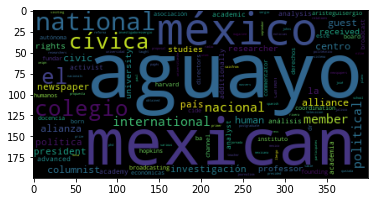

In [ ]:
# TODO: Hacer wordcloud de una columna
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud_data = data_stop.transpose()

wordcloud = WordCloud().generate_from_frequencies(cloud_data['Sergio_Aguayo'])

plt.imshow(wordcloud)